# Regression Model for calculating the price of a House

In [1]:
#Import all the necessary modules
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder


from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ridge_regression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.cluster import KMeans

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.decomposition import PCA
from scipy.stats import zscore

from scipy.stats import iqr

from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Pickle for exporting the model object
import pickle

### Problem Statement

The price of a house is highly correlated with many factors like location, size and economic situation of any
given year still it is very difficult to predict the price of a house given many attributes about the house.

The goal of this project is to predict the price of a house based on the attributes provided to us and also 
find a way to improve the sales by choosing the right attributes about a house for a given customer.

### Analytic Statement

We propose to use regression analysis linear, polynomial, random forest and svm. We evaluate and compare 
the models for accuracy and see which model is the best in performance. We propose to use the following steps for 
achieving the goal:

(1)load the data 

(2)we drop the attributes which we find not necessary for model building

(3)we impute the data for missing values and encode some attributes to categorical

(4)we perfom a univariate and bivariate analysis on the data

(5) we look for outliers and replace the outliers with median

(6)we split the data into test and train set in 70 30 proportion

(7)we build regression models

(8) we evaluate the models using various metrics and hence tune the model for better accuracy

In [2]:
#read data from csv
housing = pd.read_csv('innercity (manipulated).csv')

In [3]:
#printing few data after the load, to check if load was successful
housing.head()

,area_quality,dayhours,yr_built,yr_renovated,zipcode,basement,ceil,ceil_measure,cid,coast,...,living_measure15,long,lot_measure,lot_measure15,price,quality,room_bath,room_bed,sight,total_area
0,3,20141107T000000,1956,0,98133,0,1.0,3020,3034200666,0,...,2120,-122.336,13457,7553,808100,9,3.25,4,0,16477
1,3,20141204T000000,1976,0,98023,800,1.0,1750,8731981640,0,...,2260,-122.386,7500,8800,277500,8,2.50,4,0,10050
2,3,20150420T000000,2006,0,98038,0,2.0,2370,5104530220,0,...,2370,-121.999,4324,4348,404000,8,2.50,3,0,6694
3,3,20140529T000000,1916,0,98133,0,1.0,820,6145600285,0,...,1520,-122.349,3844,3844,300000,6,1.00,2,0,4664
4,2,20150424T000000,1954,0,98115,0,1.0,1400,8924100111,0,...,1900,-122.269,4050,5940,699000,8,1.50,2,0,5450


### Perform descriptive analysis

In [4]:
# Checking the dimension of data
housing.shape

(21613, 24)

In [5]:
# Checking for null values
housing.isnull().sum()

area_quality        0
dayhours            0
yr_built            0
yr_renovated        0
zipcode             0
basement            0
ceil                0
ceil_measure        0
cid                 0
coast               0
condition           0
furnished           0
lat                 0
living_measure      0
living_measure15    0
long                0
lot_measure         0
lot_measure15       0
price               0
quality             0
room_bath           0
room_bed            0
sight               0
total_area          0
dtype: int64

In [6]:
# Print more details of all dimensions
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
area_quality        21613 non-null int64
dayhours            21613 non-null object
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
basement            21613 non-null int64
ceil                21613 non-null float64
ceil_measure        21613 non-null int64
cid                 21613 non-null int64
coast               21613 non-null int64
condition           21613 non-null int64
furnished           21613 non-null int64
lat                 21613 non-null float64
living_measure      21613 non-null int64
living_measure15    21613 non-null int64
long                21613 non-null float64
lot_measure         21613 non-null int64
lot_measure15       21613 non-null int64
price               21613 non-null int64
quality             21613 non-null int64
room_bath           21613 non-null float64
room_bed            2

In [7]:
# Printing the 5-Summary analysis of all dimensions
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
area_quality,21613.0,2.384491e+00,7.229252e-01,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
yr_built,21613.0,1.971005e+03,2.937341e+01,1.900000e+03,1.951000e+03,1.975000e+03,1.997000e+03,2.015000e+03
yr_renovated,21613.0,8.440226e+01,4.016792e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015000e+03
zipcode,21613.0,9.807794e+04,5.350503e+01,9.800100e+04,9.803300e+04,9.806500e+04,9.811800e+04,9.819900e+04
basement,21613.0,2.915090e+02,4.425750e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.600000e+02,4.820000e+03
ceil,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
ceil_measure,21613.0,1.788391e+03,8.280910e+02,2.900000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
cid,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
coast,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [8]:
# As cid is an identifier attribute. Less useful for our analysis hence dropped.
housing = housing.drop('cid',axis = 1)

In [9]:
housing.head()

,area_quality,dayhours,yr_built,yr_renovated,zipcode,basement,ceil,ceil_measure,coast,condition,...,living_measure15,long,lot_measure,lot_measure15,price,quality,room_bath,room_bed,sight,total_area
0,3,20141107T000000,1956,0,98133,0,1.0,3020,0,5,...,2120,-122.336,13457,7553,808100,9,3.25,4,0,16477
1,3,20141204T000000,1976,0,98023,800,1.0,1750,0,3,...,2260,-122.386,7500,8800,277500,8,2.50,4,0,10050
2,3,20150420T000000,2006,0,98038,0,2.0,2370,0,3,...,2370,-121.999,4324,4348,404000,8,2.50,3,0,6694
3,3,20140529T000000,1916,0,98133,0,1.0,820,0,4,...,1520,-122.349,3844,3844,300000,6,1.00,2,0,4664
4,2,20150424T000000,1954,0,98115,0,1.0,1400,0,4,...,1900,-122.269,4050,5940,699000,8,1.50,2,0,5450


In [10]:
#Extracting year of sale from day hours.
housing['dayhours'] = housing['dayhours'].map(lambda x: str(x)[:-11])

In [11]:
housing1 = housing

In [12]:
housing['dayhours'] = housing['dayhours'].astype(int)

In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
area_quality        21613 non-null int64
dayhours            21613 non-null int32
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
basement            21613 non-null int64
ceil                21613 non-null float64
ceil_measure        21613 non-null int64
coast               21613 non-null int64
condition           21613 non-null int64
furnished           21613 non-null int64
lat                 21613 non-null float64
living_measure      21613 non-null int64
living_measure15    21613 non-null int64
long                21613 non-null float64
lot_measure         21613 non-null int64
lot_measure15       21613 non-null int64
price               21613 non-null int64
quality             21613 non-null int64
room_bath           21613 non-null float64
room_bed            21613 non-null int64
sight               21

In [14]:
#housing.at[3,"yr_renovated"] = 19555

In [15]:
#housing['yr_renovated'][3]

In [16]:
# Year renovated is replaced with year built if the house is never renovated
for i in range(0,len(housing['yr_renovated'])):
#    print(housing['yr_renovated'][i])
    if housing['yr_renovated'][i] == 0:
        housing.at[i,"yr_renovated"] = housing['yr_built'][i]

In [17]:
housing.head()

,area_quality,dayhours,yr_built,yr_renovated,zipcode,basement,ceil,ceil_measure,coast,condition,...,living_measure15,long,lot_measure,lot_measure15,price,quality,room_bath,room_bed,sight,total_area
0,3,2014,1956,1956,98133,0,1.0,3020,0,5,...,2120,-122.336,13457,7553,808100,9,3.25,4,0,16477
1,3,2014,1976,1976,98023,800,1.0,1750,0,3,...,2260,-122.386,7500,8800,277500,8,2.50,4,0,10050
2,3,2015,2006,2006,98038,0,2.0,2370,0,3,...,2370,-121.999,4324,4348,404000,8,2.50,3,0,6694
3,3,2014,1916,1916,98133,0,1.0,820,0,4,...,1520,-122.349,3844,3844,300000,6,1.00,2,0,4664
4,2,2015,1954,1954,98115,0,1.0,1400,0,4,...,1900,-122.269,4050,5940,699000,8,1.50,2,0,5450


In [18]:
#housing['yr_gap'] = housing['yr_built'] - housing['yr_renovated']

In [19]:
housing.head()

,area_quality,dayhours,yr_built,yr_renovated,zipcode,basement,ceil,ceil_measure,coast,condition,...,living_measure15,long,lot_measure,lot_measure15,price,quality,room_bath,room_bed,sight,total_area
0,3,2014,1956,1956,98133,0,1.0,3020,0,5,...,2120,-122.336,13457,7553,808100,9,3.25,4,0,16477
1,3,2014,1976,1976,98023,800,1.0,1750,0,3,...,2260,-122.386,7500,8800,277500,8,2.50,4,0,10050
2,3,2015,2006,2006,98038,0,2.0,2370,0,3,...,2370,-121.999,4324,4348,404000,8,2.50,3,0,6694
3,3,2014,1916,1916,98133,0,1.0,820,0,4,...,1520,-122.349,3844,3844,300000,6,1.00,2,0,4664
4,2,2015,1954,1954,98115,0,1.0,1400,0,4,...,1900,-122.269,4050,5940,699000,8,1.50,2,0,5450


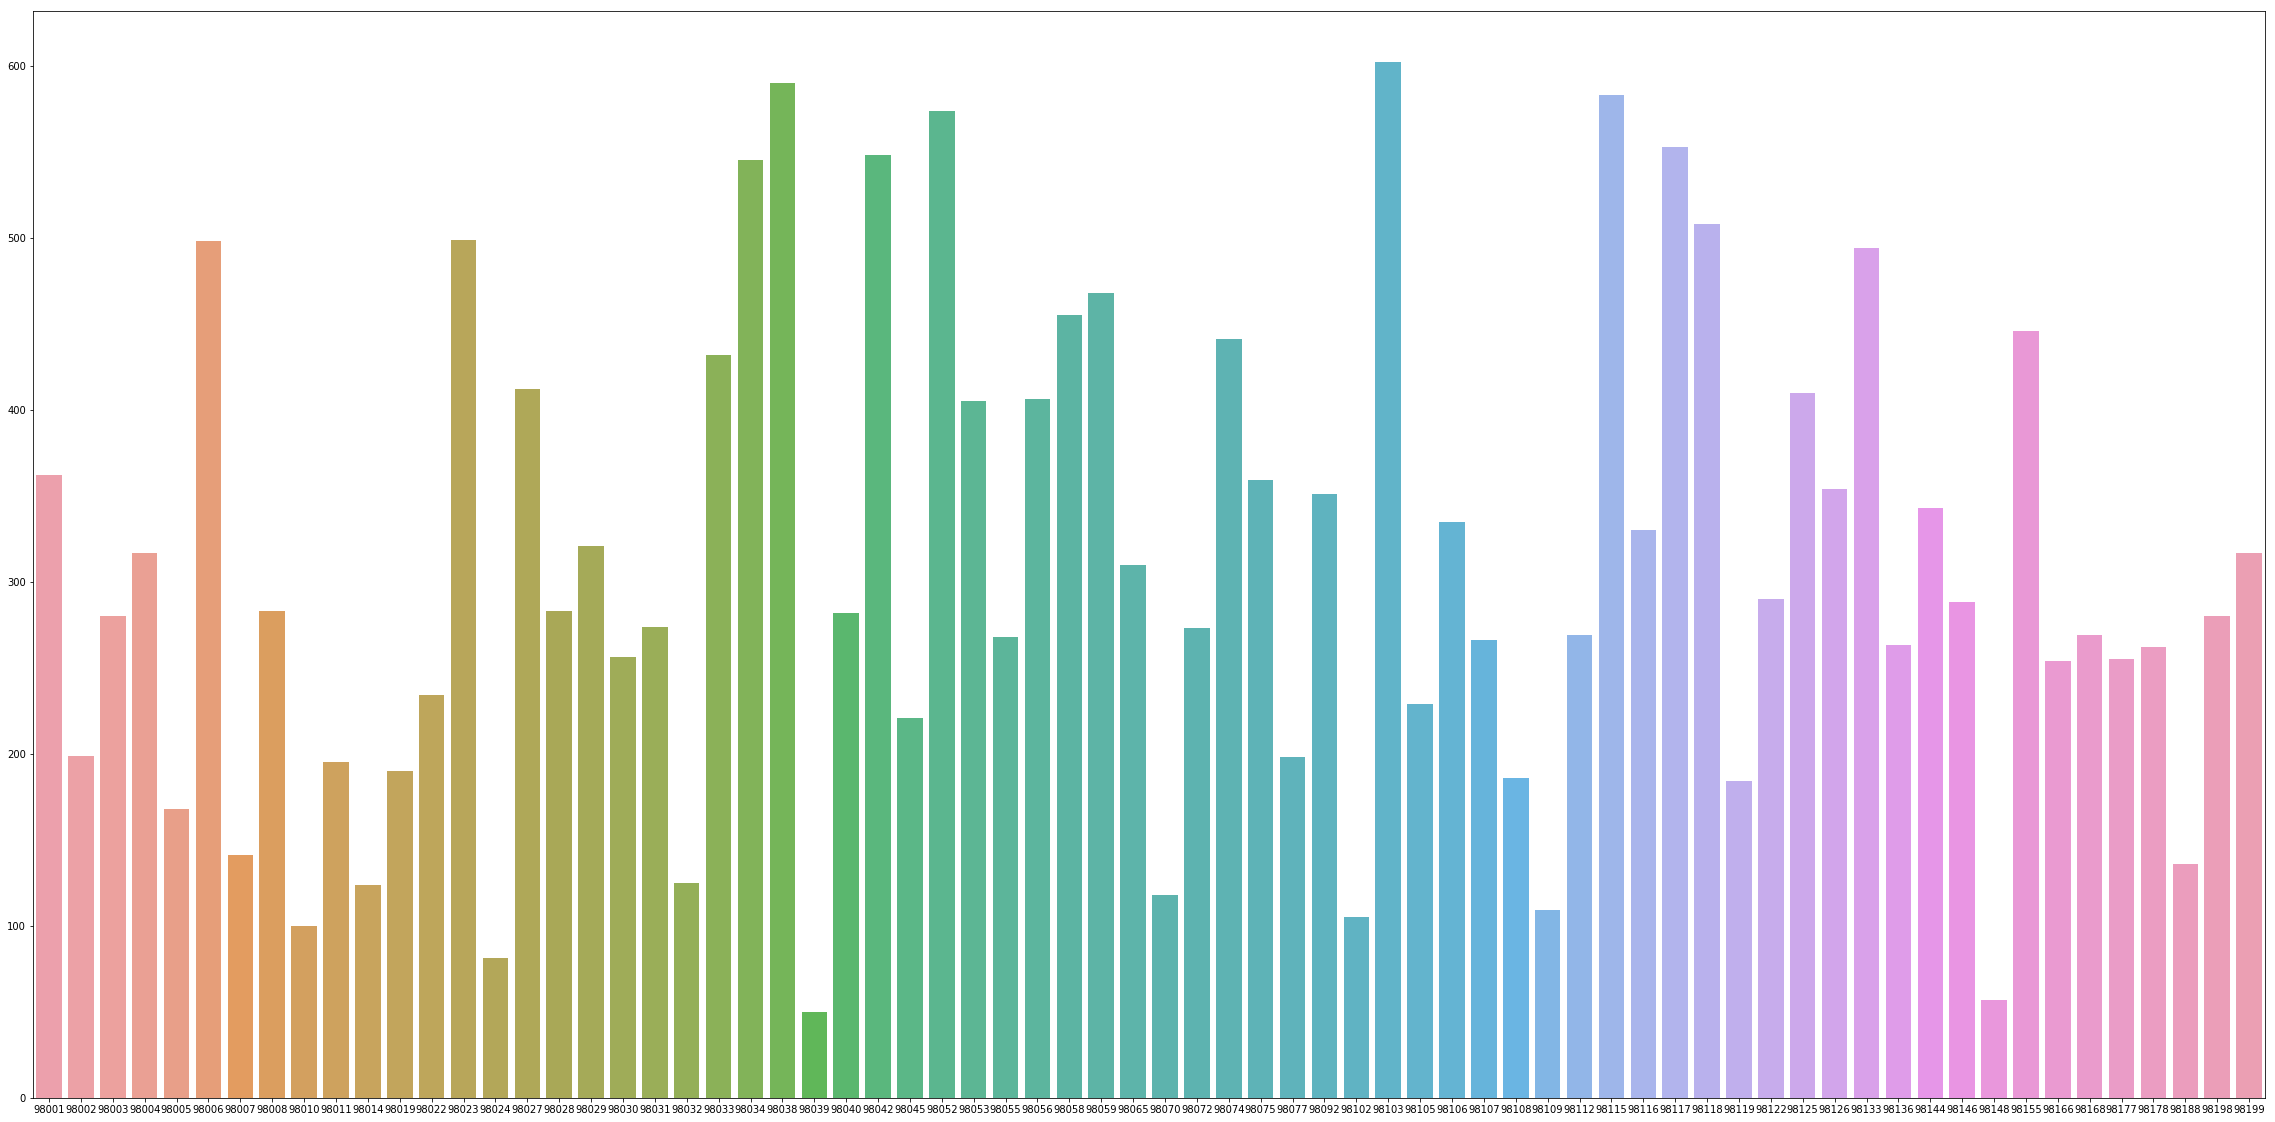

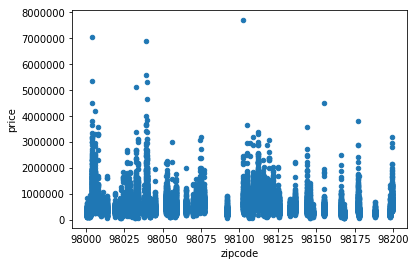

In [20]:
#  distribution of zip code of house sold and we can observe that more houses were bought from select zip codes. 
zip_count = housing['zipcode'].value_counts()
f, ax = plt.subplots(figsize=(40, 20))
sns.barplot(zip_count.index,zip_count.values, alpha=0.9)
housing.plot(kind = "scatter", x ="zipcode", y="price")
#housing.groupby(['zipcode']).count()

In [21]:
#From the above barplot of zipcode we see that there are some houses in some areas where the houses are bout more 
#frequently than in other zipcodes
#From the scatter plot also we see that the house price is high at some specific zipcodes so zip code do 
#play a very important role in price and chance of selling a house

In [22]:
lb_make = LabelEncoder()
housing["zipcode"] = lb_make.fit_transform(housing["zipcode"])

In [23]:
#housing['zipcode'] = pd.Categorical(housing.zipcode)

In [24]:
#cid_count = housing['cid'].value_counts()
#sns.barplot(cid_count.index,cid_count.values, alpha=1)
#housing.plot(kind = "scatter", x ="cid", y="price")
#housing.groupby(['cid']).count()

In [25]:
#From the table above we see that some of the houses have been sold more than once
#From the scatter plot above we see that the price of the house does not depend on the cid because we see that
# there are houses of high and low price value irrespective of the cid so we may drop this column

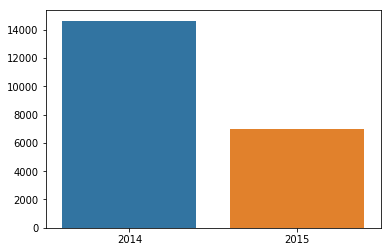

In [26]:
#Distribution of number of houses sold in 2014 vs 2015 
day_count = housing['dayhours'].value_counts()
sns.barplot(day_count.index,day_count.values, alpha=1)
#housing.groupby(['dayhours']).count()

In [27]:
#housing["dayhours"] = lb_make.fit_transform(housing["dayhours"])

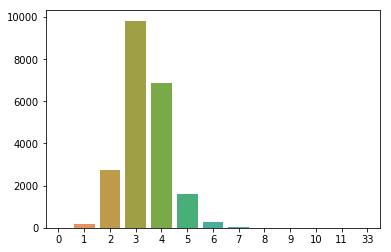

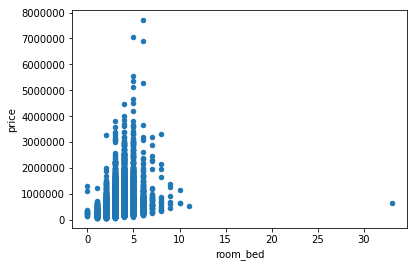

In [28]:
#  Distribution of room bed per house 
roombed_count = housing['room_bed'].value_counts()
sns.barplot(roombed_count.index,roombed_count.values, alpha=1)
housing.plot(kind = "scatter", x ="room_bed", y="price")
#housing.groupby(['room_bed']).count()

In [29]:
housing["room_bed"] = lb_make.fit_transform(housing["room_bed"])

In [30]:
#From the barplot above we see that the houses with 3 and four bed rooms are more frequently bout than houses with 1,2
# or 5 and 6 bed rooms
# from the scatter plto as expected se see that house prices are higher for 3,4,5 and 6 bedroom houses the maximum for
# five bedroom houses

,area_quality,dayhours,yr_built,yr_renovated,zipcode,basement,ceil,ceil_measure,coast,condition,...,living_measure,living_measure15,long,lot_measure,lot_measure15,price,quality,room_bed,sight,total_area
room_bath,,,,,,,,,,,,,,,,,,,,,
0.00,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
0.50,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
0.75,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
1.00,3852,3852,3852,3852,3852,3852,3852,3852,3852,3852,...,3852,3852,3852,3852,3852,3852,3852,3852,3852,3852
1.25,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
1.50,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,...,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446
1.75,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048,...,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048
2.00,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930,...,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930
2.25,2047,2047,2047,2047,2047,2047,2047,2047,2047,2047,...,2047,2047,2047,2047,2047,2047,2047,2047,2047,2047


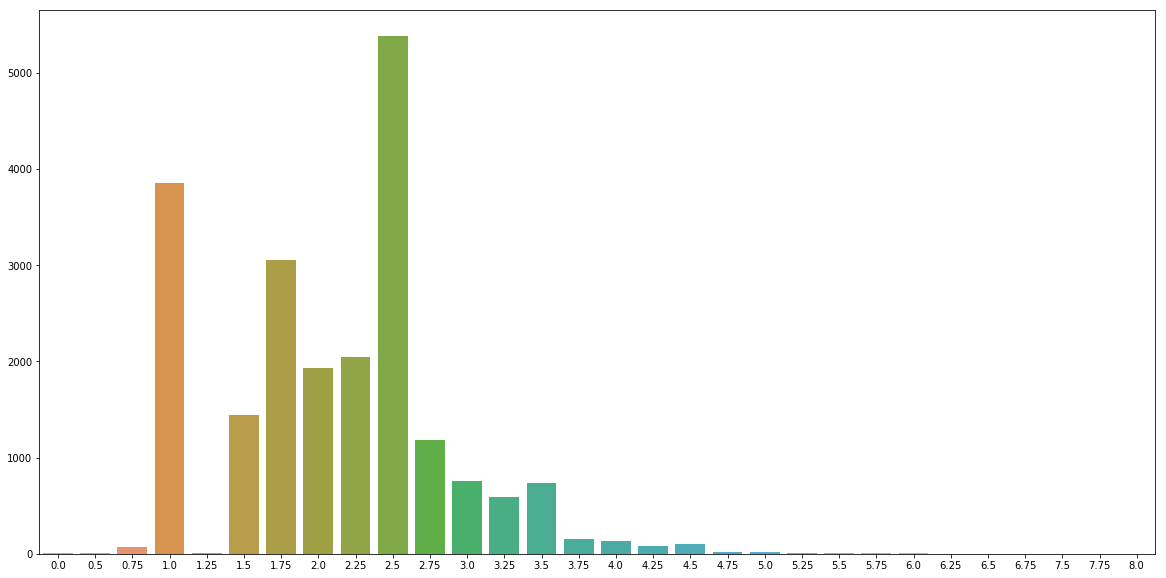

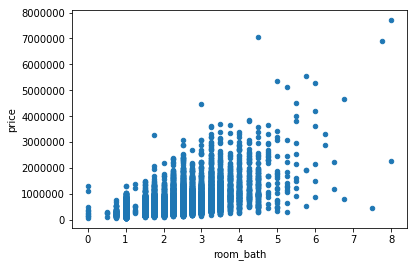

In [31]:
 # Distribution of room bath per house 
roombath_count = housing['room_bath'].value_counts()
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(roombath_count.index,roombath_count.values, alpha=1)
housing.plot(kind = "scatter", x ="room_bath", y="price")
housing.groupby(['room_bath']).count()

In [32]:
housing["room_bath"] = lb_make.fit_transform(housing["room_bath"])

In [33]:
#From the barplot we see that some houses with certain number of room baths are more frequently bought 
#compared to the others
#From the scatter plot we see that there is a trend between the house price and the room baths

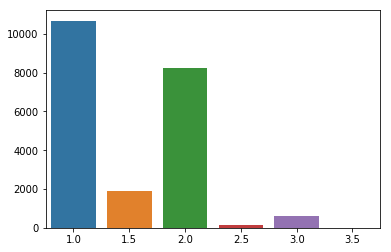

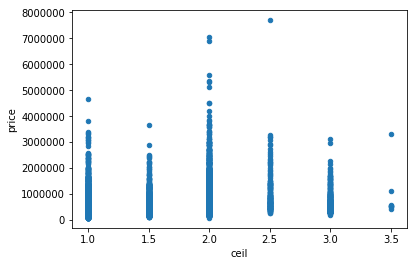

In [34]:
# Distribution of no. of floors (ceil) in the house 
ceil_count = housing['ceil'].value_counts()
sns.barplot(ceil_count.index,ceil_count.values, alpha=1)
housing.plot(kind = "scatter", x ="ceil", y="price")
#housing.groupby(['ceil']).count()

In [35]:
housing["ceil"] = lb_make.fit_transform(housing["ceil"])

In [36]:
# from the barplot we see that the 1 and 2 ceiling houses are bought more frequently than the others 
# From the scatter lt we see that the houses with 2 ceilings have the highest price compared to others but the variation
# among the others are not much

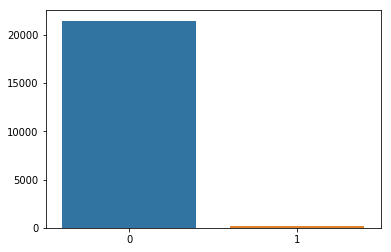

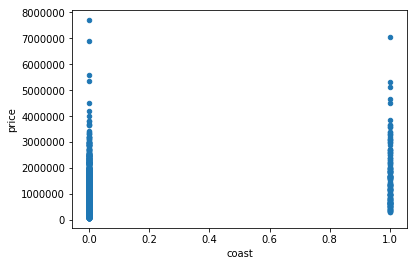

In [37]:

coast_count = housing['coast'].value_counts()
sns.barplot(coast_count.index,coast_count.values, alpha=1)
housing.plot(kind = "scatter", x ="coast", y="price")
#housing.groupby(['coast']).count()

In [38]:
#From the barplot we see that houses that have the view of a water front are rarely bought but from the scatter
#plot we see that the price difference is really not big between houses that face a water fornt or one that doesnt

,area_quality,dayhours,yr_built,yr_renovated,zipcode,basement,ceil,ceil_measure,coast,condition,...,living_measure,living_measure15,long,lot_measure,lot_measure15,price,quality,room_bath,room_bed,total_area
sight,,,,,,,,,,,,,,,,,,,,,
0,19489,19489,19489,19489,19489,19489,19489,19489,19489,19489,...,19489,19489,19489,19489,19489,19489,19489,19489,19489,19489
1,332,332,332,332,332,332,332,332,332,332,...,332,332,332,332,332,332,332,332,332,332
2,963,963,963,963,963,963,963,963,963,963,...,963,963,963,963,963,963,963,963,963,963
3,510,510,510,510,510,510,510,510,510,510,...,510,510,510,510,510,510,510,510,510,510
4,319,319,319,319,319,319,319,319,319,319,...,319,319,319,319,319,319,319,319,319,319


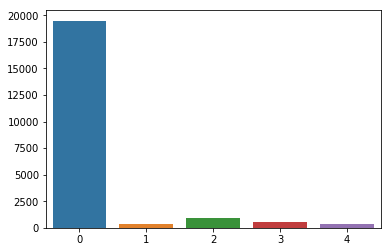

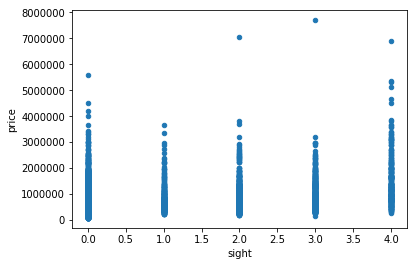

In [39]:
sight_count = housing['sight'].value_counts()
sns.barplot(sight_count.index,sight_count.values, alpha=1)
housing.plot(kind = "scatter", x ="sight", y="price")
housing.groupby(['sight']).count()

In [40]:
#From the scatter plot we see that there is not much difference between the price and the number of visits so we may 
#think of dropping this attribute

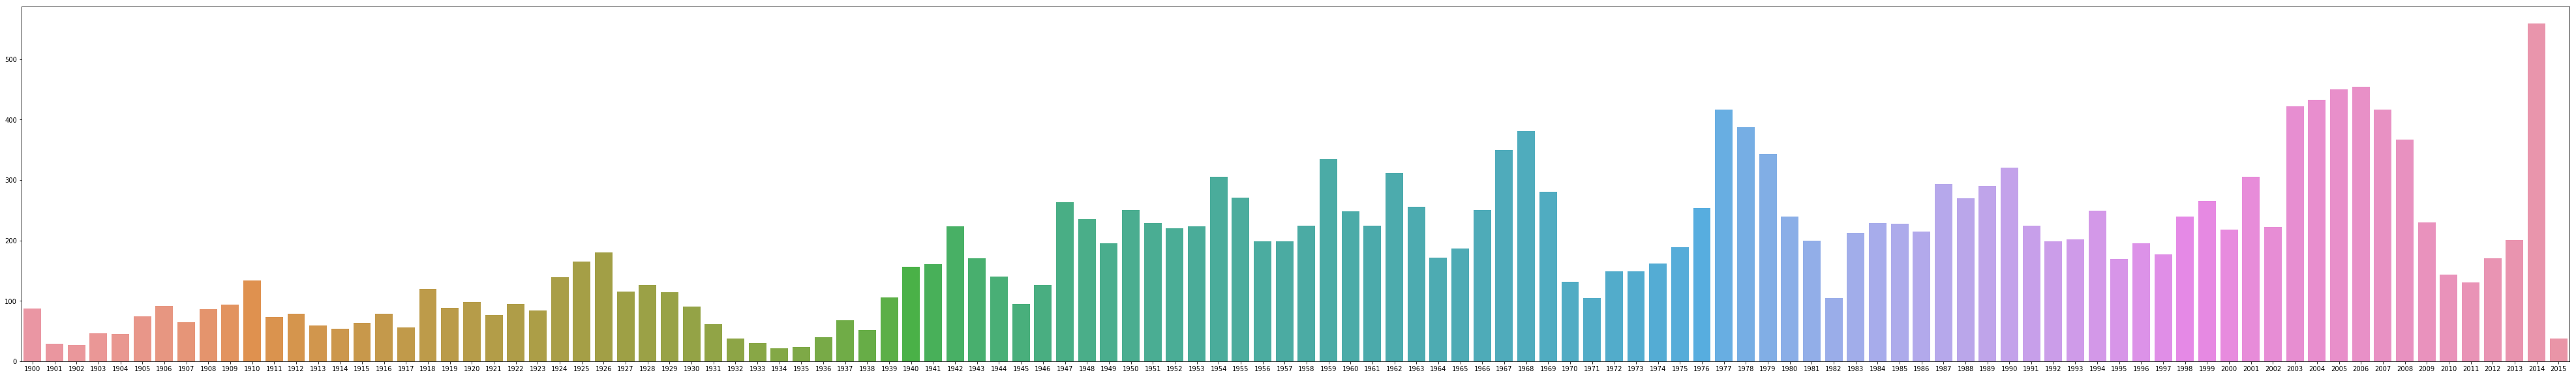

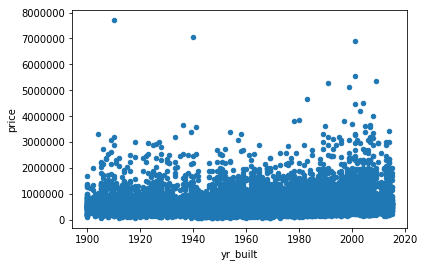

In [41]:
# Distribution of years the houses were built in chronological order 
yrbuilt_count = housing['yr_built'].value_counts()
f, ax = plt.subplots(figsize=(70, 10))
sns.barplot(yrbuilt_count.index,yrbuilt_count.values, alpha=1)
housing.plot(kind = "scatter", x ="yr_built", y="price")
#housing.groupby(['yr_built']).count()

In [42]:
#From the barplot abive we see that the houses that have been built recently have been bought more frequently than 
#other houses
# The scatter plot show that there is no fixed trend with the house price and the year that it has been built

,area_quality,dayhours,yr_built,zipcode,basement,ceil,ceil_measure,coast,condition,furnished,...,living_measure15,long,lot_measure,lot_measure15,price,quality,room_bath,room_bed,sight,total_area
yr_renovated,,,,,,,,,,,,,,,,,,,,,
1900,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,68
1901,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
1902,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
1903,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
1904,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
1905,57,57,57,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57
1906,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
1907,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
1908,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72


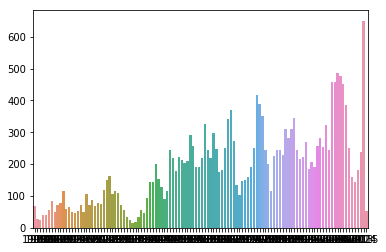

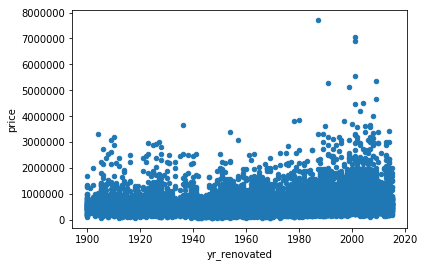

In [43]:
yrrenov_count = housing['yr_renovated'].value_counts()
sns.barplot(yrrenov_count.index,yrrenov_count.values, alpha=1)
housing.plot(kind = "scatter", x ="yr_renovated", y="price")
housing.groupby(['yr_renovated']).count()

,area_quality,dayhours,yr_built,yr_renovated,zipcode,basement,ceil,ceil_measure,coast,condition,...,living_measure15,long,lot_measure,lot_measure15,price,quality,room_bath,room_bed,sight,total_area
furnished,,,,,,,,,,,,,,,,,,,,,
0,17362,17362,17362,17362,17362,17362,17362,17362,17362,17362,...,17362,17362,17362,17362,17362,17362,17362,17362,17362,17362
1,4251,4251,4251,4251,4251,4251,4251,4251,4251,4251,...,4251,4251,4251,4251,4251,4251,4251,4251,4251,4251


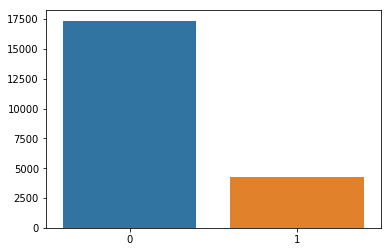

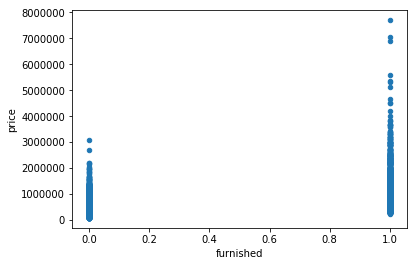

In [44]:
furnished_count = housing['furnished'].value_counts()
sns.barplot(furnished_count.index,furnished_count.values, alpha=1)
housing.plot(kind = "scatter", x ="furnished", y="price")
housing.groupby(['furnished']).count()

In [45]:
#From the barplot we se that there are more houses that are not furnished thatn houses that are furnished
#From the scatter plot we see that as expected, the houses that are furnished have higher price tat the once that 
#are not

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011A3DD3EB38>,
      dtype=object)

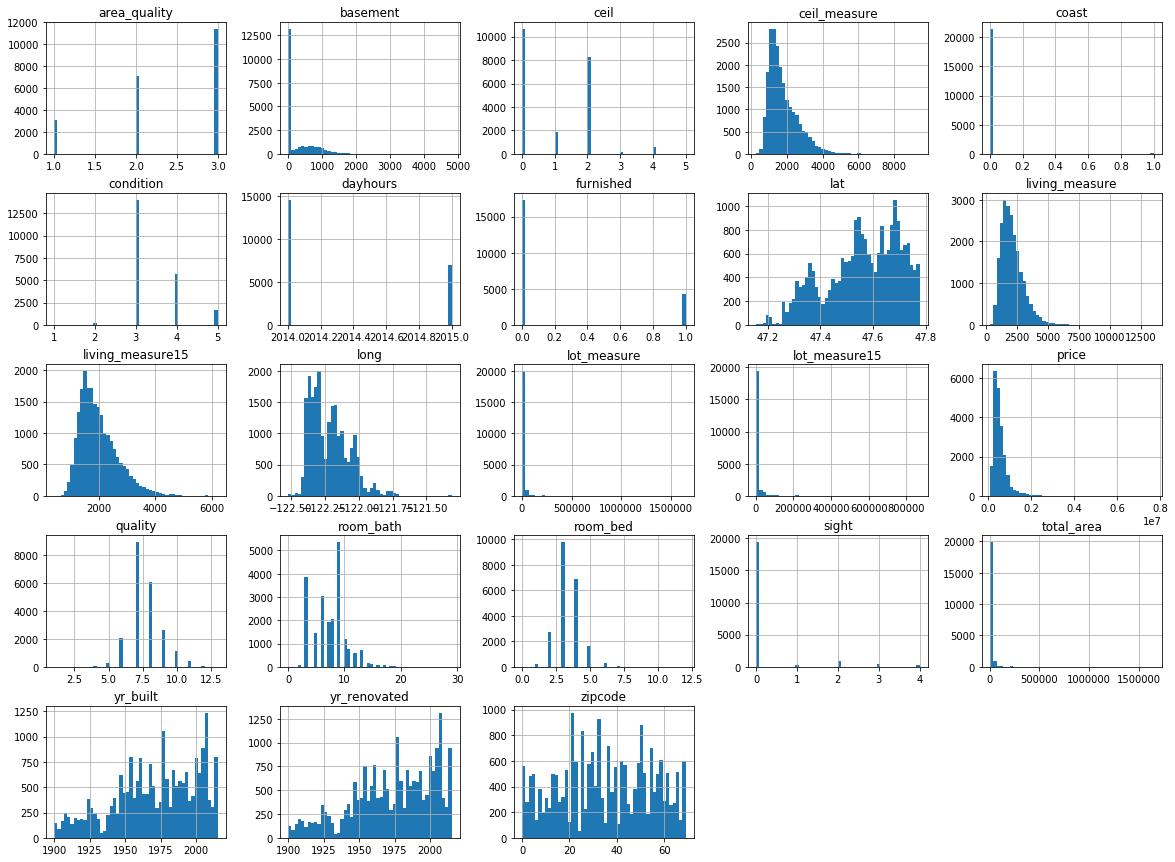

In [46]:
housing.hist(bins = 50, figsize = (20,15))

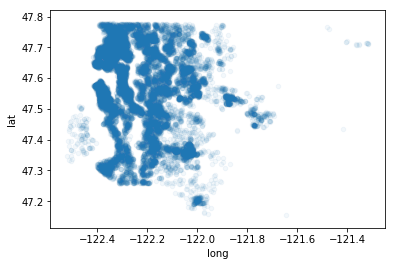

In [47]:
housing.plot(kind = "scatter", x ="long", y="lat", alpha = 0.05)

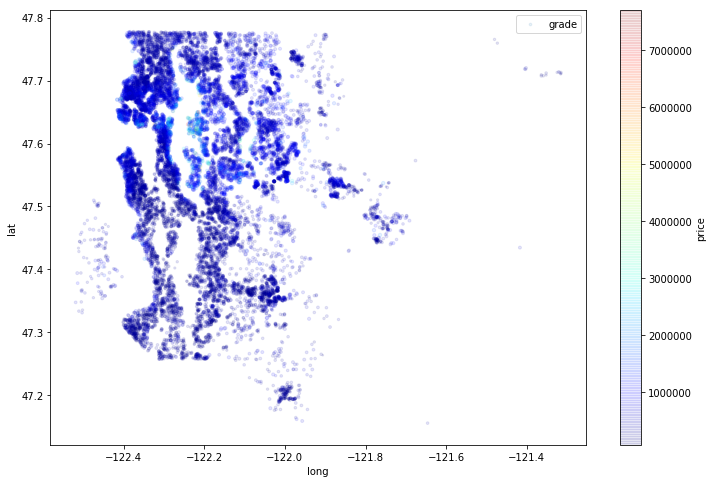

In [48]:
housing.plot(kind = "scatter", x="long", y="lat",alpha=0.1, 
             s = housing["quality"], label="grade", 
             figsize = (12,8), c ="price", cmap = plt.get_cmap("jet"), colorbar = True, 
              sharex = False )
plt.legend()

In [49]:
# From the scatter plot above we see that the house price and the quaity of houses depend on the 
#lattitude and longitude and most of the high quality and high priced 
# housea are concentrated on a londitude less than -122 

In [50]:
#housing1 = housing.drop("cid" ,axis = 1)

In [51]:
#housing1.head()

In [52]:
#housing2 = housing1.drop("dayhours", axis = 1)

In [53]:
#housing2.head()

,area_quality,dayhours,yr_built,yr_renovated,zipcode,basement,ceil,ceil_measure,coast,condition,...,living_measure15,long,lot_measure,lot_measure15,price,quality,room_bath,room_bed,sight,total_area
area_quality,1.000000,0.030421,0.040735,0.015533,0.092813,-0.153228,-0.148898,-0.217181,-0.015293,-0.042525,...,-0.319850,-0.026310,0.030832,0.026030,-0.549513,-0.363220,-0.215038,-0.102538,-0.100232,0.024752
dayhours,0.030421,1.000000,0.003507,-0.006404,0.001234,-0.015687,-0.022315,-0.023823,-0.004165,-0.045589,...,-0.021734,0.000270,0.005468,-0.000085,0.003554,-0.030387,-0.026521,-0.009319,0.001364,0.004805
yr_built,0.040735,0.003507,1.000000,0.909924,-0.327304,-0.133124,0.489319,0.423898,-0.026161,-0.361417,...,0.326229,0.409356,0.053080,0.070958,0.053982,0.446963,0.506626,0.158475,-0.053440,0.059889
yr_renovated,0.015533,-0.006404,0.909924,1.000000,-0.301435,-0.102263,0.505408,0.435904,-0.000537,-0.396358,...,0.324579,0.382967,0.052911,0.070219,0.105724,0.460796,0.537726,0.170159,-0.018264,0.060287
zipcode,0.092813,0.001234,-0.327304,-0.301435,1.000000,0.058224,-0.038788,-0.244073,0.029122,-0.006316,...,-0.266668,-0.517161,-0.125899,-0.144980,-0.050864,-0.175018,-0.193202,-0.155764,0.071363,-0.129629
basement,-0.153228,-0.015687,-0.133124,-0.102263,0.058224,1.000000,-0.245705,-0.051943,0.080588,0.174105,...,0.200355,-0.144765,0.015286,0.017276,0.323837,0.168392,0.283515,0.309128,0.276947,0.024832
ceil,-0.148898,-0.022315,0.489319,0.505408,-0.038788,-0.245705,1.000000,0.523885,0.023698,-0.263768,...,0.279885,0.125419,-0.005201,-0.011269,0.256786,0.458183,0.501149,0.180302,0.029444,0.002637
ceil_measure,-0.217181,-0.023823,0.423898,0.435904,-0.244073,-0.051943,0.523885,1.000000,0.072075,-0.158214,...,0.731870,0.343803,0.183512,0.194050,0.605566,0.755923,0.685303,0.489171,0.167649,0.202127
coast,-0.015293,-0.004165,-0.026161,-0.000537,0.029122,0.080588,0.023698,0.072075,1.000000,0.016653,...,0.086463,-0.041910,0.021604,0.030703,0.266331,0.082775,0.063820,-0.006636,0.401857,0.023809
condition,-0.042525,-0.045589,-0.361417,-0.396358,-0.006316,0.174105,-0.263768,-0.158214,0.016653,1.000000,...,-0.092824,-0.106500,-0.008958,-0.003406,0.036392,-0.144674,-0.125225,0.026494,0.045990,-0.010219


<Figure size 864x720 with 0 Axes>

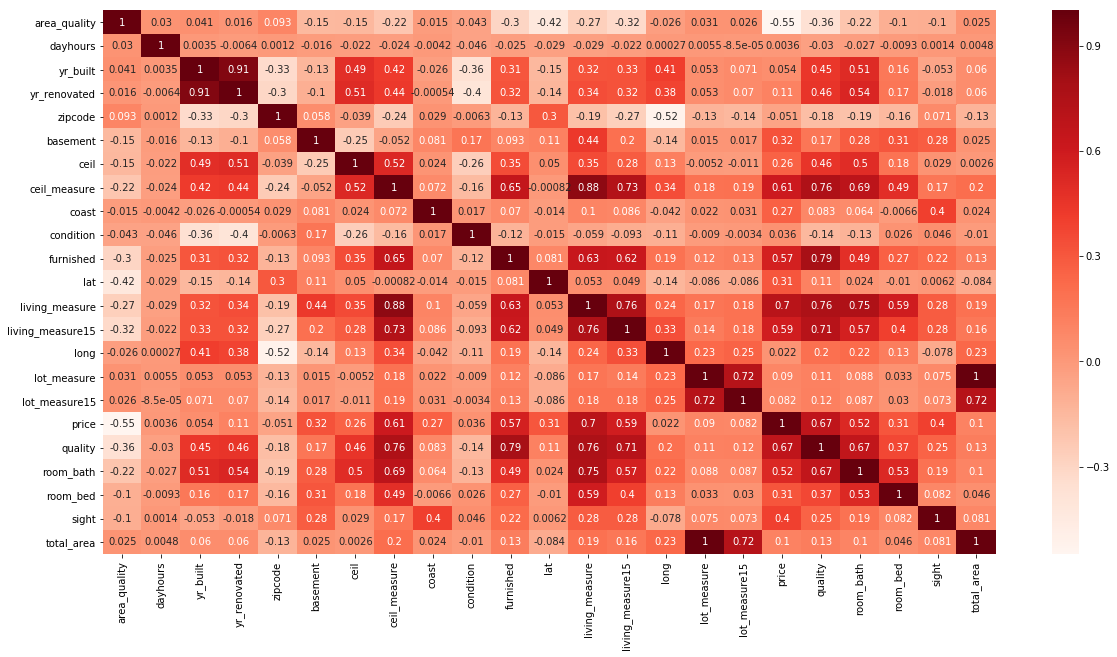

In [54]:
plt.figure(figsize =(12,10))
corr = housing.corr()
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, annot = True, cmap = plt.cm.Reds)
corr

In [55]:
#sns.pairplot(housing, diag_kind = 'kde')

In [56]:
# From the pairplot we see that the there are some linear trneds between some of the pairs of attributes. Example
# between lot_measure and total_area, between ceiling_measure and living_measure so we can either discard one of them.
# Also we can perform a PCA to reduce the noise in the information

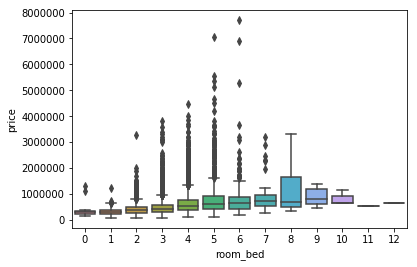

In [57]:
# Statistical analysis of house price by number of bed rooms
sns.boxplot(x = 'room_bed', y = 'price', data = housing)

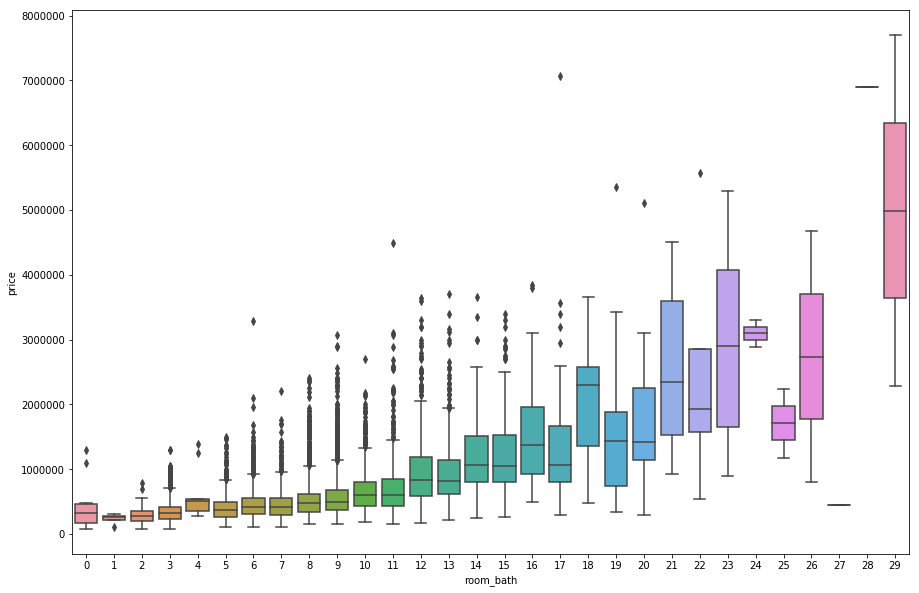

In [58]:
# Statistical analysis of house price by number of bath rooms
f, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(x = 'room_bath', y = 'price', data = housing)

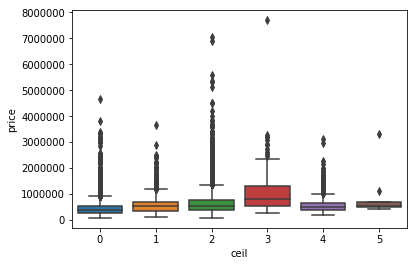

In [59]:
# Statistical analysis for prices of houses by ceil
sns.boxplot(x = 'ceil', y = 'price', data = housing)

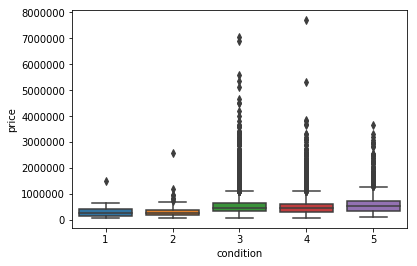

In [60]:
# Statistical analysis for prices of houses by condition
sns.boxplot(x = 'condition', y = 'price', data = housing)

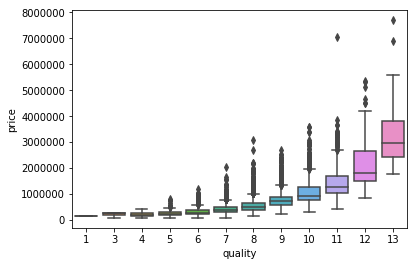

In [61]:
# Statistical analysis of house price by quality
sns.boxplot(x = 'quality', y = 'price', data = housing)

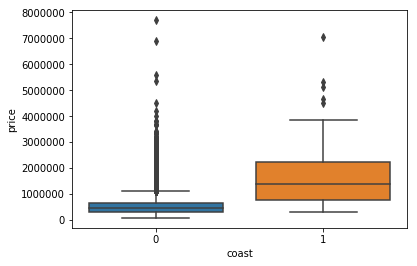

In [62]:
# Statistical analysis of house price by coastal region
sns.boxplot(x = 'coast', y = 'price', data = housing)

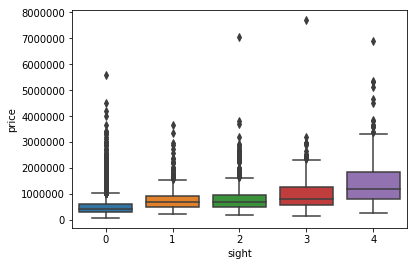

In [63]:
# Statistical analysis of house price by view sight
sns.boxplot(x = 'sight', y = 'price', data = housing)

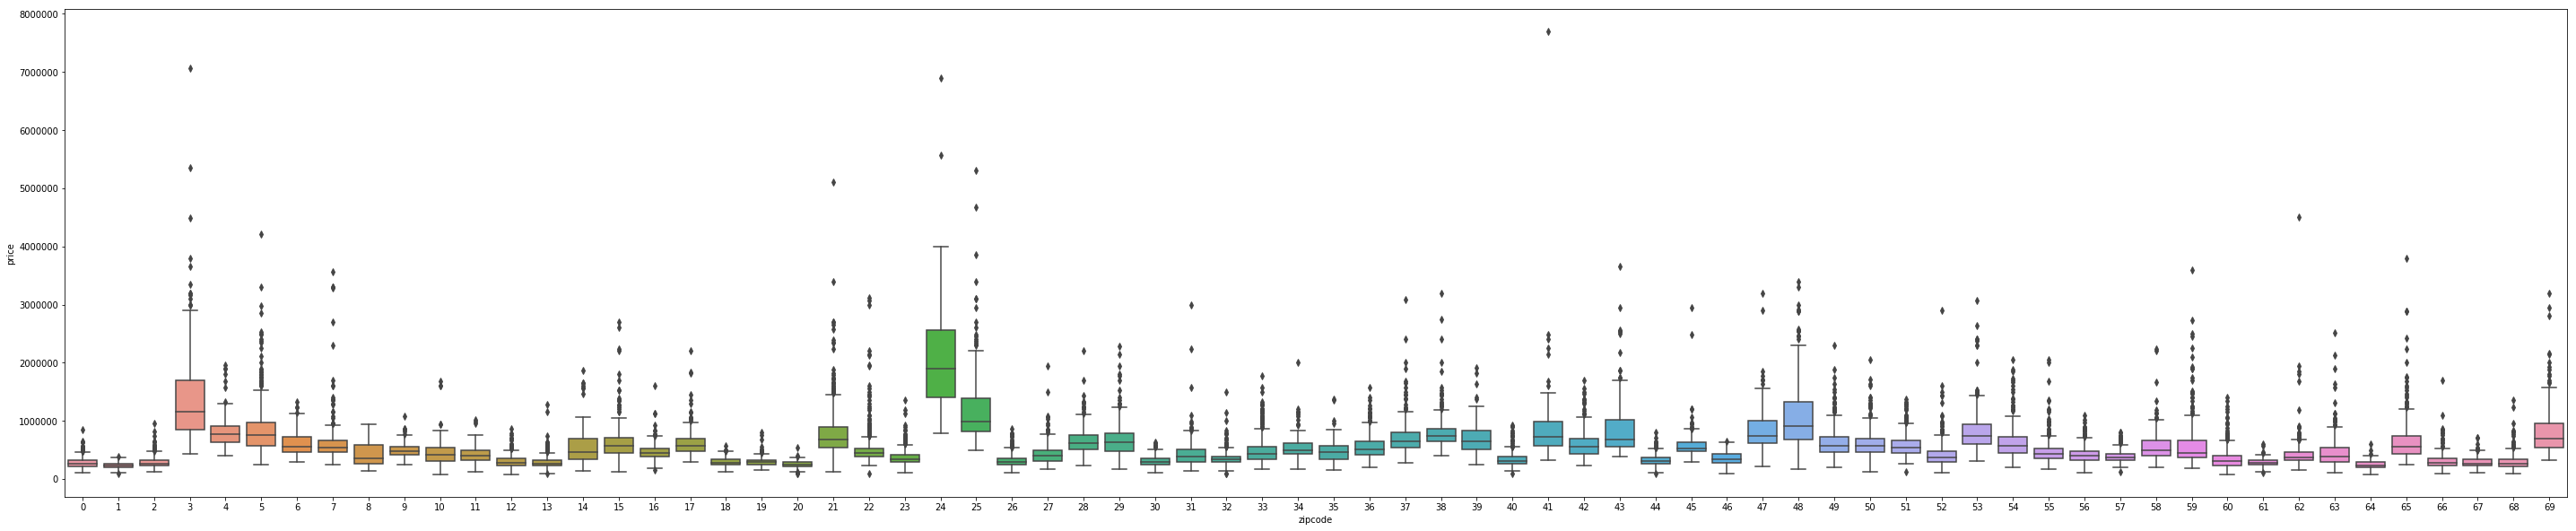

In [64]:
f, ax = plt.subplots(figsize=(50, 10))
sns.boxplot(x = 'zipcode', y = 'price', data = housing)

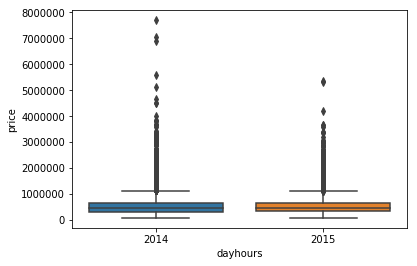

In [65]:
sns.boxplot(x = 'dayhours', y = 'price', data = housing)

In [66]:
housing_data = housing.copy(deep=True)

In [67]:
housing_data = housing_data.drop('lot_measure15', axis = 1)

In [68]:
housing_data = housing_data.drop('living_measure15', axis = 1)

In [69]:
housing_data.head().transpose()

,0,1,2,3,4
area_quality,3.0000,3.0000,3.0000,3.0000,2.0000
dayhours,2014.0000,2014.0000,2015.0000,2014.0000,2015.0000
yr_built,1956.0000,1976.0000,2006.0000,1916.0000,1954.0000
yr_renovated,1956.0000,1976.0000,2006.0000,1916.0000,1954.0000
zipcode,57.0000,13.0000,23.0000,57.0000,49.0000
basement,0.0000,800.0000,0.0000,0.0000,0.0000
ceil,0.0000,0.0000,2.0000,0.0000,0.0000
ceil_measure,3020.0000,1750.0000,2370.0000,820.0000,1400.0000
coast,0.0000,0.0000,0.0000,0.0000,0.0000
condition,5.0000,3.0000,3.0000,4.0000,4.0000


In [70]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
area_quality      21613 non-null int64
dayhours          21613 non-null int32
yr_built          21613 non-null int64
yr_renovated      21613 non-null int64
zipcode           21613 non-null int64
basement          21613 non-null int64
ceil              21613 non-null int64
ceil_measure      21613 non-null int64
coast             21613 non-null int64
condition         21613 non-null int64
furnished         21613 non-null int64
lat               21613 non-null float64
living_measure    21613 non-null int64
long              21613 non-null float64
lot_measure       21613 non-null int64
price             21613 non-null int64
quality           21613 non-null int64
room_bath         21613 non-null int64
room_bed          21613 non-null int64
sight             21613 non-null int64
total_area        21613 non-null int64
dtypes: float64(2), int32(1), int64(18)
memory usage: 3.4 MB


In [71]:
housing_data = pd.get_dummies(housing_data, columns=['area_quality',
                                                     'coast','furnished'])

In [72]:
#Method for a drawing a Plot for all the attributes of the dataset which is passed. 
def drawPlot(data, plot_method = sns.distplot):
    n = int((data.columns.size)/4)+1
    f, axes = plt.subplots(n, 4, figsize=(15,20))
    row = 0
    colval = 0
    for col in data.columns:     
        plot_method(data[col],ax = axes[row, colval], )
        colval = colval +1
        if(colval%4 ==0):
            colval = 0
            row = row + 1
        

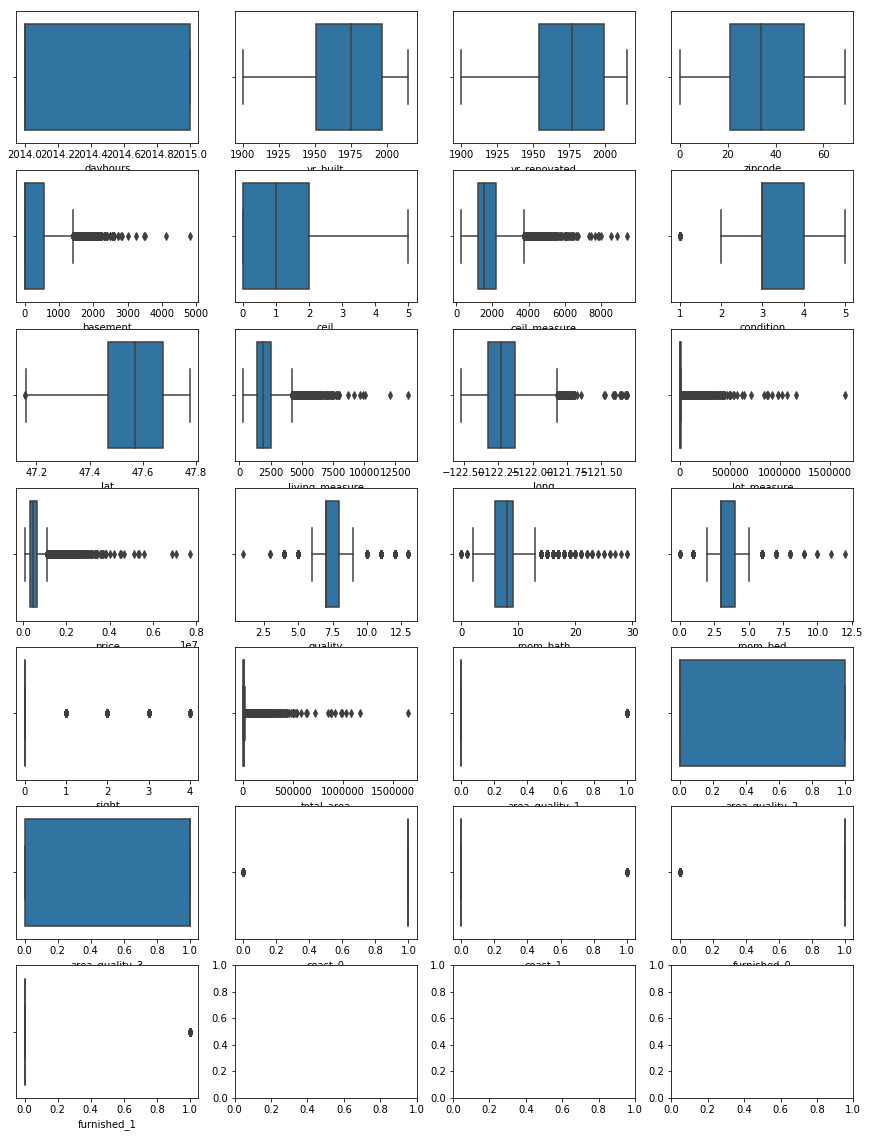

In [73]:
drawPlot(housing_data, sns.boxplot)

In [74]:
columns = ['price','room_bed','room_bath','living_measure','lot_measure','ceil_measure','basement','total_area']
housing_data.head()

,dayhours,yr_built,yr_renovated,zipcode,basement,ceil,ceil_measure,condition,lat,living_measure,...,room_bed,sight,total_area,area_quality_1,area_quality_2,area_quality_3,coast_0,coast_1,furnished_0,furnished_1
0,2014,1956,1956,57,0,0,3020,5,47.7174,3020,...,4,0,16477,0,0,1,1,0,0,1
1,2014,1976,1976,13,800,0,1750,3,47.3165,2550,...,4,0,10050,0,0,1,1,0,1,0
2,2015,2006,2006,23,0,2,2370,3,47.3515,2370,...,3,0,6694,0,0,1,1,0,1,0
3,2014,1916,1916,57,0,0,820,4,47.7049,820,...,2,0,4664,0,0,1,1,0,1,0
4,2015,1954,1954,49,0,0,1400,4,47.6768,1400,...,2,0,5450,0,1,0,1,0,1,0


In [75]:
# Function to prune ourliers
def outlier_pruning(col, outlier_pruned_df):
    iqr = outlier_pruned_df[col].quantile(0.75) - outlier_pruned_df[col].quantile(0.25) 
    iqr = iqr * 1.5
    print('IQR for '+col+' :',iqr)
    lower_quartile = outlier_pruned_df[col].quantile(0.25) - iqr
    upper_quartile = outlier_pruned_df[col].quantile(0.75) + iqr
    outlier_pruned_df[col].loc[outlier_pruned_df[col]<lower_quartile]=np.NaN
    outlier_pruned_df[col] = outlier_pruned_df[col].fillna(value=lower_quartile, axis=0)

    outlier_pruned_df[col].loc[outlier_pruned_df[col]>upper_quartile] = np.NaN
    outlier_pruned_df[col] = outlier_pruned_df[col].fillna(value=upper_quartile, axis=0)

In [76]:
outlier_pruned_df = housing_data.copy(deep=True)
for col in columns:
    outlier_pruning(col, outlier_pruned_df)

IQR for price : 484575.0


C:\Users\SONY\Anaconda3\New folder\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


IQR for room_bed : 1.5
IQR for room_bath : 4.5
IQR for living_measure : 1684.5
IQR for lot_measure : 8472.0
IQR for ceil_measure : 1530.0
IQR for basement : 840.0
IQR for total_area : 8947.5


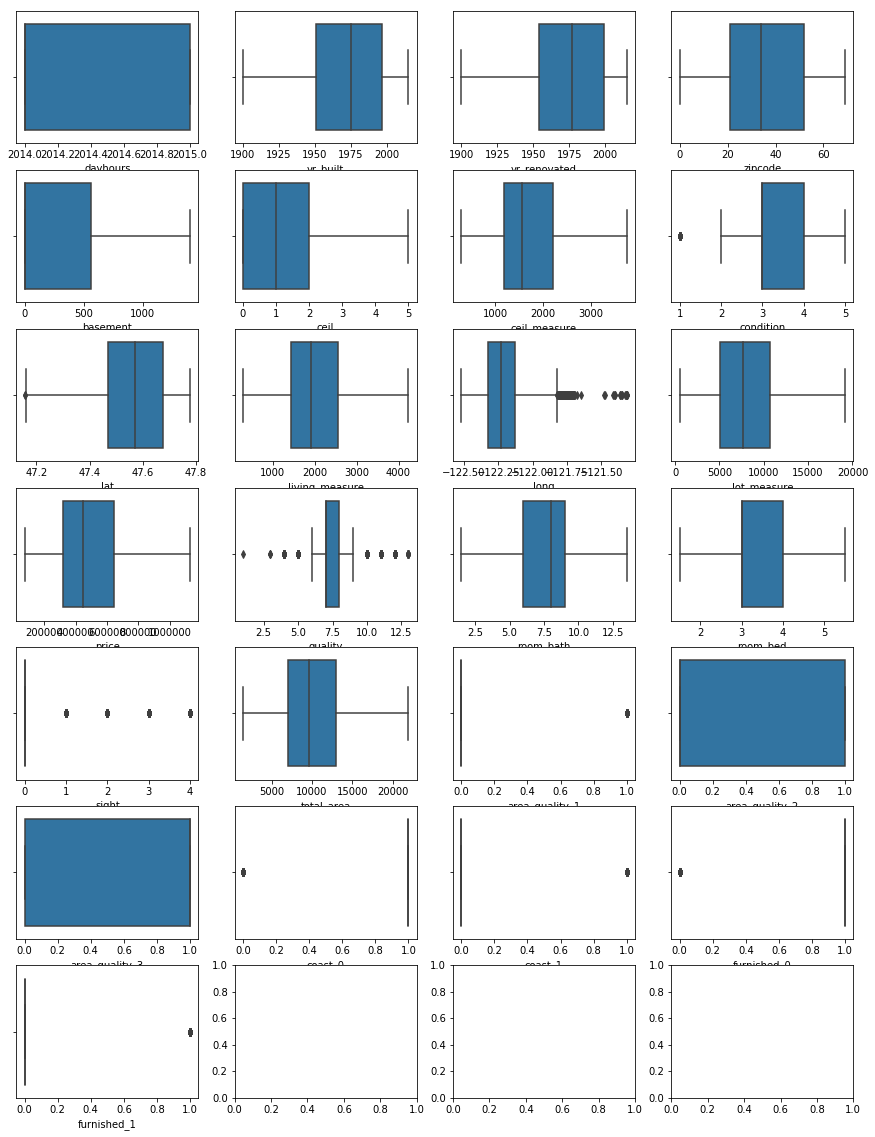

In [77]:
drawPlot(outlier_pruned_df, sns.boxplot)

### Model Building

#### Linear Regression

In [78]:

housing_data1 = housing_data.drop('price', axis = 1)
X = housing_data1
y = housing_data['price']
print(X)

       dayhours  yr_built  yr_renovated  zipcode  basement  ceil  \
0          2014      1956          1956       57         0     0   
1          2014      1976          1976       13       800     0   
2          2015      2006          2006       23         0     2   
3          2014      1916          1916       57         0     0   
4          2015      1954          1954       49         0     0   
5          2014      1989          1989       33         0     2   
6          2014      1954          1954       57         0     0   
7          2014      1949          1949       16       880     0   
8          2014      1953          1953       53      1200     0   
9          2014      1969          1969        2         0     0   
10         2014      1905          1905       51         0     0   
11         2014      1998          1998       40         0     2   
12         2015      1994          1994       29         0     2   
13         2015      1901          1987       53

In [79]:
X_train, X_test, y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state =1)

In [80]:
regression_model1 = LinearRegression()
regression_model1.fit(X_train,y_train)
for idx, col_name in enumerate(X_train.columns):
    print("The  coefficient of  {} is {}".format(col_name,regression_model1.coef_[idx]))

The  coefficient of  dayhours is 28880.280466302353
The  coefficient of  yr_built is -2463.0562323203867
The  coefficient of  yr_renovated is 689.7508244872992
The  coefficient of  zipcode is -538.1740458866065
The  coefficient of  basement is 5735088726333.927
The  coefficient of  ceil is -6943.068265675475
The  coefficient of  ceil_measure is 5735088726392.297
The  coefficient of  condition is 22592.86614295965
The  coefficient of  lat is 393375.0107306417
The  coefficient of  living_measure is 11475396910820.98
The  coefficient of  long is -202022.15876411807
The  coefficient of  lot_measure is 17210485637009.629
The  coefficient of  quality is 58662.57454854122
The  coefficient of  room_bath is 9627.156802780533
The  coefficient of  room_bed is -35599.74535142303
The  coefficient of  sight is 52435.56852423825
The  coefficient of  total_area is -17210485637009.592
The  coefficient of  area_quality_1 is -2110550.292422568
The  coefficient of  area_quality_2 is -2301251.913822625
The

In [81]:
regression_model1.score(X_train,y_train)

0.7504286063633094

In [82]:
corr = housing_data.corr()
cor_target = abs(corr["price"])
relevant_features = cor_target[cor_target > 0.3]
relevant_features

basement          0.323837
ceil_measure      0.605566
lat               0.306919
living_measure    0.702044
price             1.000000
quality           0.667463
room_bath         0.524507
room_bed          0.314895
sight             0.397346
area_quality_1    0.465745
area_quality_3    0.469143
furnished_0       0.565991
furnished_1       0.565991
Name: price, dtype: float64

In [83]:
def keep_cols(DataFrame, keep_these):
    """Keep only the columns [keep_these] in a DataFrame, delete
    all other columns. 
    """
    drop_these = list(set(list(DataFrame)) - set(keep_these))
    return DataFrame.drop(drop_these, axis = 1)

In [84]:
housing_data1 = housing_data.pipe(keep_cols,['basement','ceil_measure','lat','living_measure','price','quality',
                                              'room_bath','room_bed','sight','area_quality_1_0','area_qualoty_1_1',
                                               'area_quality_3_0','area_quality_3_1','furnished_0_0','furnished_0_1',
                                                'furnished_1_0','furnished_1_1'])

In [85]:
housing_data1.head()

,basement,ceil_measure,lat,living_measure,price,quality,room_bath,room_bed,sight
0,0,3020,47.7174,3020,808100,9,12,4,0
1,800,1750,47.3165,2550,277500,8,9,4,0
2,0,2370,47.3515,2370,404000,8,9,3,0
3,0,820,47.7049,820,300000,6,3,2,0
4,0,1400,47.6768,1400,699000,8,5,2,0


In [86]:
y = housing_data1['price']
housing_data11 = housing_data1.copy()
housing_data12 = housing_data11.drop('price', axis = 1)
X = housing_data12
print(X)

       basement  ceil_measure      lat  living_measure  quality  room_bath  \
0             0          3020  47.7174            3020        9         12   
1           800          1750  47.3165            2550        8          9   
2             0          2370  47.3515            2370        8          9   
3             0           820  47.7049             820        6          3   
4             0          1400  47.6768            1400        8          5   
5             0          2050  47.5279            2050        9          9   
6             0          1480  47.7311            1480        7          6   
7           880          1220  47.7592            2100        7          5   
8          1200          1400  47.6370            2600        8          7   
9             0          1130  47.3437            1130        7          3   
10            0           710  47.6765             710        7          3   
11            0          2350  47.3321            2350        9 

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =1)

In [88]:
regression_model1 = LinearRegression()
regression_model1.fit(X_train,y_train)
for idx, col_name in enumerate(X_train.columns):
    print("The  coefficient of  {} is {}".format(col_name,regression_model1.coef_[idx]))

The  coefficient of  basement is -113188692825115.6
The  coefficient of  ceil_measure is -113188692825122.02
The  coefficient of  lat is 661583.1246128082
The  coefficient of  living_measure is 113188692825333.02
The  coefficient of  quality is 73539.87881469727
The  coefficient of  room_bath is -3284.0543823242188
The  coefficient of  room_bed is -33952.90377807617
The  coefficient of  sight is 93669.21797180176


In [89]:
regression_model1.score(X_test,y_test)

0.6350748297840075

In [90]:
from sklearn.feature_selection import RFE

In [91]:
y = housing_data['price']
housing_data1 = housing_data.copy()
housing_data2 = housing_data1.drop('price', axis = 1)
X = housing_data2
print(X)

       dayhours  yr_built  yr_renovated  zipcode  basement  ceil  \
0          2014      1956          1956       57         0     0   
1          2014      1976          1976       13       800     0   
2          2015      2006          2006       23         0     2   
3          2014      1916          1916       57         0     0   
4          2015      1954          1954       49         0     0   
5          2014      1989          1989       33         0     2   
6          2014      1954          1954       57         0     0   
7          2014      1949          1949       16       880     0   
8          2014      1953          1953       53      1200     0   
9          2014      1969          1969        2         0     0   
10         2014      1905          1905       51         0     0   
11         2014      1998          1998       40         0     2   
12         2015      1994          1994       29         0     2   
13         2015      1901          1987       53

In [92]:
import statsmodels.api as sm

In [93]:
X_1 = sm.add_constant(X)
model2 = sm.OLS(y,X_1).fit()
model2.pvalues

const              1.257305e-69
dayhours           5.812545e-30
yr_built          3.488088e-109
yr_renovated       1.055955e-07
zipcode            3.498363e-09
basement           7.259811e-14
ceil               1.267186e-02
ceil_measure      4.150667e-256
condition          1.409970e-25
lat               2.795985e-253
living_measure     0.000000e+00
long               5.242573e-60
lot_measure        0.000000e+00
quality           7.195432e-146
room_bath          1.553976e-34
room_bed           5.762598e-75
sight             2.053451e-163
total_area         0.000000e+00
area_quality_1     3.975366e-68
area_quality_2     6.263142e-70
area_quality_3     7.760161e-71
coast_0            1.519203e-71
coast_1            9.929234e-68
furnished_0        1.038063e-69
furnished_1        1.524950e-69
dtype: float64

In [94]:
cols = list(X.columns)
pmax = 1
while(len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model2 = sm.OLS(y,X_1).fit()
    p = pd.Series(model2.pvalues.values[1:], index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
       cols.remove(feature_with_p_max)
    else:
        break
#print(model2.pvalues)        
selected_features_BE = cols
print(selected_features_BE)

['dayhours', 'yr_built', 'yr_renovated', 'zipcode', 'basement', 'ceil', 'ceil_measure', 'condition', 'lat', 'living_measure', 'long', 'lot_measure', 'quality', 'room_bath', 'room_bed', 'sight', 'total_area', 'area_quality_1', 'area_quality_2', 'area_quality_3', 'coast_0', 'coast_1', 'furnished_0', 'furnished_1']


In [95]:
housing_data1 = housing_data.pipe(keep_cols,selected_features_BE)

In [96]:
y = housing_data['price']
X = housing_data1
print(X)

       dayhours  yr_built  yr_renovated  zipcode  basement  ceil  \
0          2014      1956          1956       57         0     0   
1          2014      1976          1976       13       800     0   
2          2015      2006          2006       23         0     2   
3          2014      1916          1916       57         0     0   
4          2015      1954          1954       49         0     0   
5          2014      1989          1989       33         0     2   
6          2014      1954          1954       57         0     0   
7          2014      1949          1949       16       880     0   
8          2014      1953          1953       53      1200     0   
9          2014      1969          1969        2         0     0   
10         2014      1905          1905       51         0     0   
11         2014      1998          1998       40         0     2   
12         2015      1994          1994       29         0     2   
13         2015      1901          1987       53

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =1)

In [98]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)
for idx, col_name in enumerate(X_train.columns):
    print("The  coefficient of  {} is {}".format(col_name,regression_model.coef_[idx]))

The  coefficient of  dayhours is 28880.280466302353
The  coefficient of  yr_built is -2463.0562323203867
The  coefficient of  yr_renovated is 689.7508244872992
The  coefficient of  zipcode is -538.1740458866065
The  coefficient of  basement is 5735088726333.927
The  coefficient of  ceil is -6943.068265675475
The  coefficient of  ceil_measure is 5735088726392.297
The  coefficient of  condition is 22592.86614295965
The  coefficient of  lat is 393375.0107306417
The  coefficient of  living_measure is 11475396910820.98
The  coefficient of  long is -202022.15876411807
The  coefficient of  lot_measure is 17210485637009.629
The  coefficient of  quality is 58662.57454854122
The  coefficient of  room_bath is 9627.156802780533
The  coefficient of  room_bed is -35599.74535142303
The  coefficient of  sight is 52435.56852423825
The  coefficient of  total_area is -17210485637009.592
The  coefficient of  area_quality_1 is -2110550.292422568
The  coefficient of  area_quality_2 is -2301251.913822625
The

In [99]:
regression_model.score(X_test, y_test)

0.7483816355694334

In [100]:
X_1 = sm.add_constant(X)
model3 = sm.OLS(y,X_1).fit()

In [101]:
n_feat = np.arange(1,24)
h_score = 0
opt_var = 0
att_list = []
for n in range(len(n_feat)):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)
    model = LinearRegression()
    rfe1 = RFE(model,n_feat[n])
    X_train_rfe = rfe1.fit_transform(X_train,y_train)
    X_test_rfe = rfe1.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score1 = model.score(X_test_rfe,y_test)
    att_list.append(score1)
    if (score1>h_score):
        h_score = score1
        opt_var = n_feat[n]
print("number of features is %d"%opt_var)
print("score with %d features: %f" %(opt_var,h_score))

number of features is 23
score with 23 features: 0.748177


In [102]:
cols = list(X.columns)
model = LinearRegression()
rfe = RFE(model,23)
X_rfe = rfe.fit_transform(X,y)
model.fit(X_rfe,y)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['dayhours', 'yr_built', 'yr_renovated', 'basement', 'ceil',
       'ceil_measure', 'condition', 'lat', 'living_measure', 'long',
       'lot_measure', 'quality', 'room_bath', 'room_bed', 'sight',
       'total_area', 'area_quality_1', 'area_quality_2', 'area_quality_3',
       'coast_0', 'coast_1', 'furnished_0', 'furnished_1'],
      dtype='object')


In [103]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso

In [104]:
housing_data1 = housing_data.drop('price', axis = 1)
X = housing_data1
y = housing_data['price']
print(X)

       dayhours  yr_built  yr_renovated  zipcode  basement  ceil  \
0          2014      1956          1956       57         0     0   
1          2014      1976          1976       13       800     0   
2          2015      2006          2006       23         0     2   
3          2014      1916          1916       57         0     0   
4          2015      1954          1954       49         0     0   
5          2014      1989          1989       33         0     2   
6          2014      1954          1954       57         0     0   
7          2014      1949          1949       16       880     0   
8          2014      1953          1953       53      1200     0   
9          2014      1969          1969        2         0     0   
10         2014      1905          1905       51         0     0   
11         2014      1998          1998       40         0     2   
12         2015      1994          1994       29         0     2   
13         2015      1901          1987       53

In [105]:
reg1= LassoCV()
reg1.fit(X,y)
print("Best alpha using built-in LassoCV: %f" % reg1.alpha_)
print("Best score using built-in LassoCV: %f" %reg1.score(X,y))
coef = pd.Series(reg1.coef_, index = X.columns)

C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 1601019.186437
Best score using built-in LassoCV: 0.500509


In [106]:
print("Lasso picked up" + str(sum(coef!=0)) + "variables and eliminated the other" + str(sum(coef==0)) + "variable")

Lasso picked up4variables and eliminated the other20variable


Text(0.5, 1.0, 'feature importance using Lasso method')

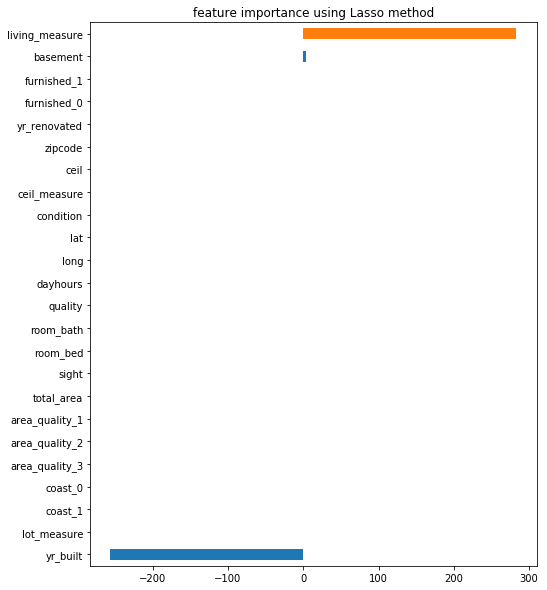

In [107]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize']=(8.0,10.0)
imp_coef.plot(kind = "barh")
plt.title("feature importance using Lasso method")

In [108]:
from sklearn.pipeline import make_pipeline

In [109]:
housing_data1 = housing_data.drop('price', axis = 1)
X = housing_data1
y = housing_data['price']
#print(X)

In [118]:
#def PolynomialRegression(degree=2, **kwargs):
#    return make_pipeline(PolynomialFeatures(degree),
#                         LinearRegression(**kwargs))

In [119]:
#from sklearn.model_selection import validation_curve

In [120]:
#degree = np.arange(0, 10)
#train_score, val_score = validation_curve(PolynomialRegression(), X, y,
#                                          'polynomialfeatures__degree', degree, cv=5)

#plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
#plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
#plt.legend(loc='best')
#plt.ylim(0, 1)
#plt.xlabel('degree')
#plt.ylabel('score');

In [121]:
#from sklearn.model_selection import learning_curve

C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


MemoryError: 

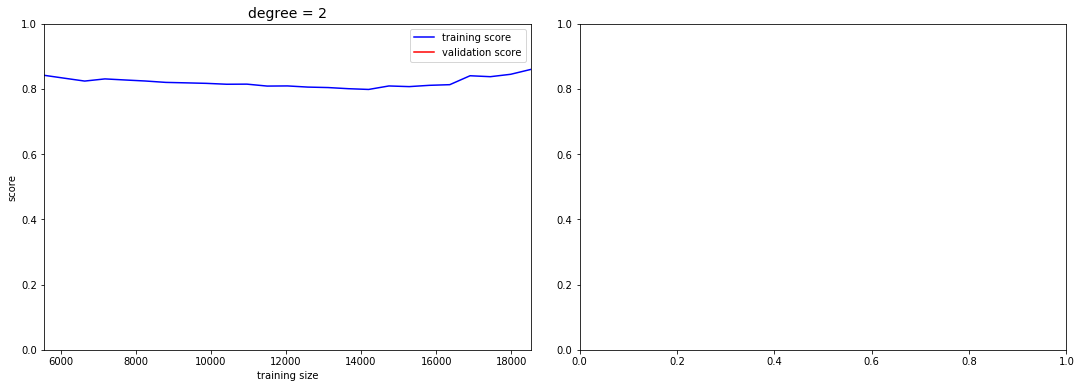

In [122]:
#fig, ax = plt.subplots(1, 2, figsize=(16, 6))
#fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

#for i, degree in enumerate([2, 9]):
#    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
#                                         X, y, cv=7,
#                                         train_sizes=np.linspace(0.3, 1, 25))

#    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
#    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
#    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
#                 color='gray', linestyle='dashed')

#    ax[i].set_ylim(0, 1)
#    ax[i].set_xlim(N[0], N[-1])
#    ax[i].set_xlabel('training size')
#    ax[i].set_ylabel('score')
#    ax[i].set_title('degree = {0}'.format(degree), size=14)
#    ax[i].legend(loc='best')

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
param_grid = {'polynomialfeatures__degree': np.arange(10),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [ ]:
grid.fit(X, y);

In [ ]:
grid.best_params_

In [125]:
def test(models, data, iterations = 100):
    results = {}
    for i in models:
        r2_train = []
        r2_test = []
        for j in range(iterations):
            X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)
            r2_test.append(metrics.r2_score(y_test,
                                            models[i].fit(X_train, 
                                                         y_train).predict(X_test)))
            r2_train.append(metrics.r2_score(y_train, 
                                             models[i].fit(X_train, 
                                                          y_train).predict(X_train)))
        results[i] = [np.mean(r2_train), np.mean(r2_test)]
    return pd.DataFrame(results)


In [126]:
from sklearn import linear_model

In [127]:
models = {'OLS': linear_model.LinearRegression(),
         'Lasso': linear_model.Lasso(),
         'Ridge': linear_model.Ridge(),}

In [128]:
test(models,housing_data)

C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective di

C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective di

C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective di

C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective di

C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective di

C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective di

C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective di

,OLS,Lasso,Ridge
0,0.750286,0.749621,0.750789
1,0.748487,0.751145,0.746602


In [130]:
lasso_params = {'alpha':[0.02,0.024,0.025,0.026,0.03]}
ridge_params = {'alpha':[200,230,250,265,270,275,290,300,500]}
models2 = {'OLS':linear_model.LinearRegression(),
           'Lasso':GridSearchCV(linear_model.Lasso(),
                    param_grid=lasso_params).fit(X,y).best_estimator_,
           'Ridge':GridSearchCV(linear_model.Ridge(),param_grid=ridge_params).fit(X,y).best_estimator_,}

C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did 

In [136]:
test(models2,housing_data)

,OLS,Lasso,Ridge
0,0.750215,0.750361,0.742156
1,0.748572,0.748123,0.741443


In [144]:
from sklearn.pipeline import Pipeline

In [146]:
lasso_params = {'fit__alpha':[0.02,0.024,0.025,0.026,0.03]}
ridge_params = {'fit__alpha':[550,580,600,620,650]}
pipe1 = Pipeline([('poly',PolynomialFeatures()),('fit',linear_model.LinearRegression())])
pipe2 = Pipeline([('poly',PolynomialFeatures()),('fit',linear_model.Lasso())])
pipe3 = Pipeline([('poly',PolynomialFeatures()),('fit',linear_model.Ridge())])
models3 = {'OLS':pipe1,'Lasso':GridSearchCV(pipe2,param_grid=lasso_params).fit(X,y).best_estimator_,
           'Ridge':GridSearchCV(pipe3,param_grid=ridge_params).fit(X,y).best_estimator_,}

C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective di

In [147]:
test(models3, housing_data)

C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective di

C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective di

C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective di

C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective di

C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective di

C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective di

C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective di

,OLS,Lasso,Ridge
0,0.865430,0.832581,0.849998
1,0.849833,0.821068,0.838048


In [159]:
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error, make_scorer
#from FeatureTransformer import FeatureTransformer

In [160]:
#preprocess = FeatureTransformer()
gbm = GradientBoostingRegressor(learning_rate = 0.1,
                                random_state = 1234)
pipe = Pipeline([("gbm", gbm)])

gbm_cv = GridSearchCV(pipe,dict(gbm__n_estimators = [50, 100, 150, 200],gbm__max_depth = [5, 6, 7, 8, 9, 10]),
                      cv = 5,scoring = make_scorer(mean_squared_error),verbose = 100)
gbm_cv.fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] gbm__max_depth=5, gbm__n_estimators=50 ..........................
[CV]  gbm__max_depth=5, gbm__n_estimators=50, score=7862943693.895796, total=   5.1s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s
[CV] gbm__max_depth=5, gbm__n_estimators=50 ..........................
[CV]  gbm__max_depth=5, gbm__n_estimators=50, score=6742118422.391667, total=   2.8s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.2s remaining:    0.0s
[CV] gbm__max_depth=5, gbm__n_estimators=50 ..........................
[CV]  gbm__max_depth=5, gbm__n_estimators=50, score=5018377217.784493, total=   2.2s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.6s remaining:    0.0s
[CV] gbm__max_depth=5, gbm__n_estimators=50 ..........................
[CV]  gbm__max_depth=5, gbm__n_estimators=50, score=10683571705.577135, total=

[CV]  gbm__max_depth=6, gbm__n_estimators=150, score=92173672552.39987, total=   8.9s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  3.5min remaining:    0.0s
[CV] gbm__max_depth=6, gbm__n_estimators=200 .........................
[CV]  gbm__max_depth=6, gbm__n_estimators=200, score=6400094499.266524, total=  11.8s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  3.7min remaining:    0.0s
[CV] gbm__max_depth=6, gbm__n_estimators=200 .........................
[CV]  gbm__max_depth=6, gbm__n_estimators=200, score=5590614352.454062, total=  11.5s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:  3.9min remaining:    0.0s
[CV] gbm__max_depth=6, gbm__n_estimators=200 .........................
[CV]  gbm__max_depth=6, gbm__n_estimators=200, score=4239184173.2712145, total=  11.5s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:  4.1min remaining:    0.0s
[CV] gbm__max_depth=6, gbm__n_estimators=200 .........................
[CV]  gbm__max_depth=6, gbm__n_estimators=200, scor

[CV]  gbm__max_depth=8, gbm__n_estimators=100, score=106229402941.78015, total=  12.0s
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  9.7min remaining:    0.0s
[CV] gbm__max_depth=8, gbm__n_estimators=150 .........................
[CV]  gbm__max_depth=8, gbm__n_estimators=150, score=6288393304.138342, total=  17.8s
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed: 10.0min remaining:    0.0s
[CV] gbm__max_depth=8, gbm__n_estimators=150 .........................
[CV]  gbm__max_depth=8, gbm__n_estimators=150, score=5554279993.199066, total=  16.9s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 10.2min remaining:    0.0s
[CV] gbm__max_depth=8, gbm__n_estimators=150 .........................
[CV]  gbm__max_depth=8, gbm__n_estimators=150, score=3962082574.4825335, total=  17.4s
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed: 10.5min remaining:    0.0s
[CV] gbm__max_depth=8, gbm__n_estimators=150 .........................
[CV]  gbm__max_depth=8, gbm__n_estimators=150, sco

[CV]  gbm__max_depth=10, gbm__n_estimators=100, score=5618133218.321783, total=  23.1s
[CV] gbm__max_depth=10, gbm__n_estimators=100 ........................
[CV]  gbm__max_depth=10, gbm__n_estimators=100, score=3792709569.004992, total=  23.2s
[CV] gbm__max_depth=10, gbm__n_estimators=100 ........................
[CV]  gbm__max_depth=10, gbm__n_estimators=100, score=10564566276.330463, total=  22.0s
[CV] gbm__max_depth=10, gbm__n_estimators=100 ........................
[CV]  gbm__max_depth=10, gbm__n_estimators=100, score=129711871136.09857, total=  22.1s
[CV] gbm__max_depth=10, gbm__n_estimators=150 ........................
[CV]  gbm__max_depth=10, gbm__n_estimators=150, score=6409428703.245301, total=  32.1s
[CV] gbm__max_depth=10, gbm__n_estimators=150 ........................
[CV]  gbm__max_depth=10, gbm__n_estimators=150, score=5596279908.719222, total=  32.5s
[CV] gbm__max_depth=10, gbm__n_estimators=150 ........................
[CV]  gbm__max_depth=10, gbm__n_estimators=150, sc

C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('gbm', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_...234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gbm__n_estimators': [50, 100, 150, 200], 'gbm__max_depth': [5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error), verbose=100)

In [169]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [171]:
for depth in range (1,10):
    tree_regressor=tree.DecisionTreeRegressor(max_depth=depth,random_state=1)
    if tree_regressor.fit(X,y).tree_.max_depth<depth:
         break
    score=np.mean(cross_val_score(tree_regressor,X,y,scoring='neg_mean_squared_error', cv= 5,n_jobs=1))
    print(depth, score)

1 -132502371950.58963
2 -100933551872.89743
3 -93301688496.91785
4 -73879767508.80188
5 -73410510192.13266
6 -54378517181.85661
7 -50448901970.426285
8 -45204265118.76808
9 -48509429405.484314


In [172]:
ada=AdaBoostRegressor()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv= 5)

In [ ]:
search.fit(X,y)
search.best_params_

In [ ]:
search.best_score_